In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
import sweetviz as sv
from imblearn.combine import SMOTETomek
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix,mean_squared_error,accuracy_score
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz

In [ ]:
pip install pydot-ng

In [ ]:
!apt-get -qq install -y graphviz && pip install pydot

In [ ]:
!pip install graphviz

In [ ]:
# !pip install sweetviz

In [ ]:
data = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
# !pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
# !pip install pandas-profiling

In [ ]:
# profile = ProfileReport(data, title="Pandas Profiling Report",explorative=True)
# profile

In [ ]:
# report = sv.analyze(data)

In [ ]:
# report.show_html()

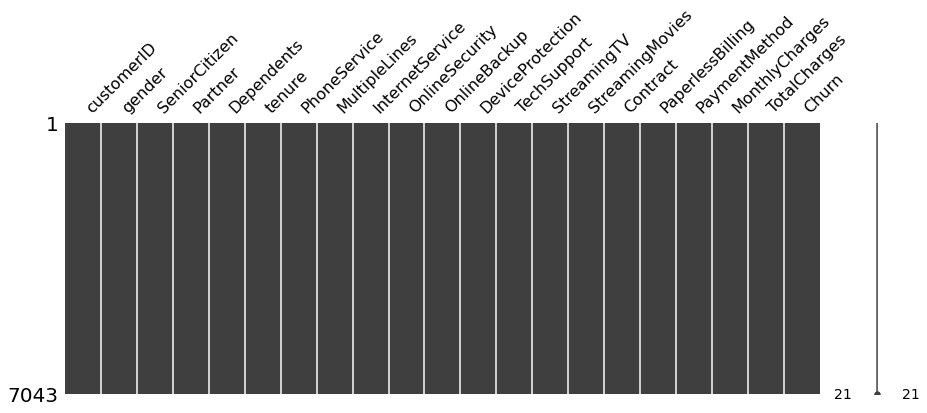

In [ ]:
msno.matrix(data,figsize=(15,5))

In [ ]:
data.isnull().sum().sum()

0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
data.isin([" "]).sum().sum()

11

In [ ]:
data.TotalCharges = data.TotalCharges.str.replace(' ','')

In [ ]:
data.isin([" "]).sum().sum()

0

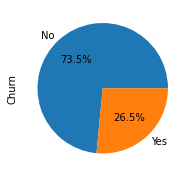

In [ ]:
data.Churn.value_counts().plot(kind="pie", autopct='%.1f%%', figsize=(3,3))

In [ ]:
data.shape

(7043, 21)

In [ ]:
x = data.drop(['customerID','Churn'],axis=1)

In [ ]:
y = data['Churn']= data['Churn'].map({'Yes':1,'No':0})

In [ ]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [ ]:
label_Encod = LabelEncoder()
x = x.apply(label_Encod.fit_transform)
x.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,991,1597
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,1340,5698
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,137,2994
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,795,2660
7042,1,0,0,0,66,1,0,1,2,0,2,2,2,2,2,1,0,1388,5407


In [ ]:
X = pd.get_dummies(x)

In [ ]:
# X

In [ ]:
smk = SMOTETomek(random_state=42)
x_res,y_res = smk.fit_sample(X,y)

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x_res,y_res,test_size=0.30,random_state = 42)

In [ ]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((6591, 19), (6591,), (2825, 19), (2825,))

In [ ]:
dt_model = DecisionTreeClassifier()

In [ ]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred = dt_model.predict(x_test)

In [ ]:
y_pred_training =dt_model.predict(x_train)
y_pred_training

array([0, 1, 1, ..., 0, 0, 1])

In [ ]:
train_error = mean_squared_error(y_pred_training,y_train)

In [ ]:
train_error

0.0018206645425580337

In [ ]:
confusion_matrix(y_test,y_pred)

array([[1139,  268],
       [ 268, 1150]])

In [ ]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.81      0.81      0.81      1407\n           1       0.81      0.81      0.81      1418\n\n    accuracy                           0.81      2825\n   macro avg       0.81      0.81      0.81      2825\nweighted avg       0.81      0.81      0.81      2825\n'

In [ ]:
accuracy_score(y_test,y_pred)*100

81.02654867256636

In [ ]:
dt_model.predict(x_test)

array([1, 0, 1, ..., 0, 1, 1])

In [ ]:
parameter = {'criterion':['gini','entropy'],
             'max_depth':[2,3,4,5,6,7,8,9,10,None]}

In [ ]:
grid_result = GridSearchCV(dt_model,parameter,cv=5,n_jobs=-1)
grid_result


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [ ]:
final = grid_result.fit(x_train,y_train)
final

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [ ]:
final.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
final.best_params_

{'criterion': 'entropy', 'max_depth': 9}

In [ ]:
final.best_score_

0.816114313851138

In [ ]:
data= [float(num) for num in (input('Enter values').strip().split())]
data
prediction = dt_model.predict([data])
prediction

Enter values1	0	1	1	1	0	1	0	0	2	0	0	0	0	0	0	2	148	2592


array([1])

In [ ]:
x.head(30)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,2505
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,1466
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,157
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,1400
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,925
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,1274,6104
6,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,1075,1550
7,0,0,0,0,10,0,1,0,2,0,0,0,0,0,0,0,3,140,2609
8,0,0,1,0,28,1,2,1,0,0,2,2,2,2,0,1,2,1371,2646
9,1,0,0,1,62,1,0,0,2,2,0,0,0,0,1,0,0,482,3022


In [ ]:
Result = pd.DataFrame({'Actual':y_test,"predicted":y_pred})
Result

,Actual,predicted
0,1,1
1,0,0
2,1,1
3,1,1
4,1,1
...,...,...
2820,0,0
2821,0,0
2822,0,0
2823,1,1


In [ ]:
Result.iloc[[27]]

,Actual,predicted
27,1,1


In [ ]:
dot_dat = StringIO()

In [ ]:
export_graphviz(dt_model,out_file=dot_dat,filled=True,rounded=True,special_characters=True)

In [ ]:
graph = pydotplus.graph_from_dot_data(dot_dat.getvalue())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.561502 to fit



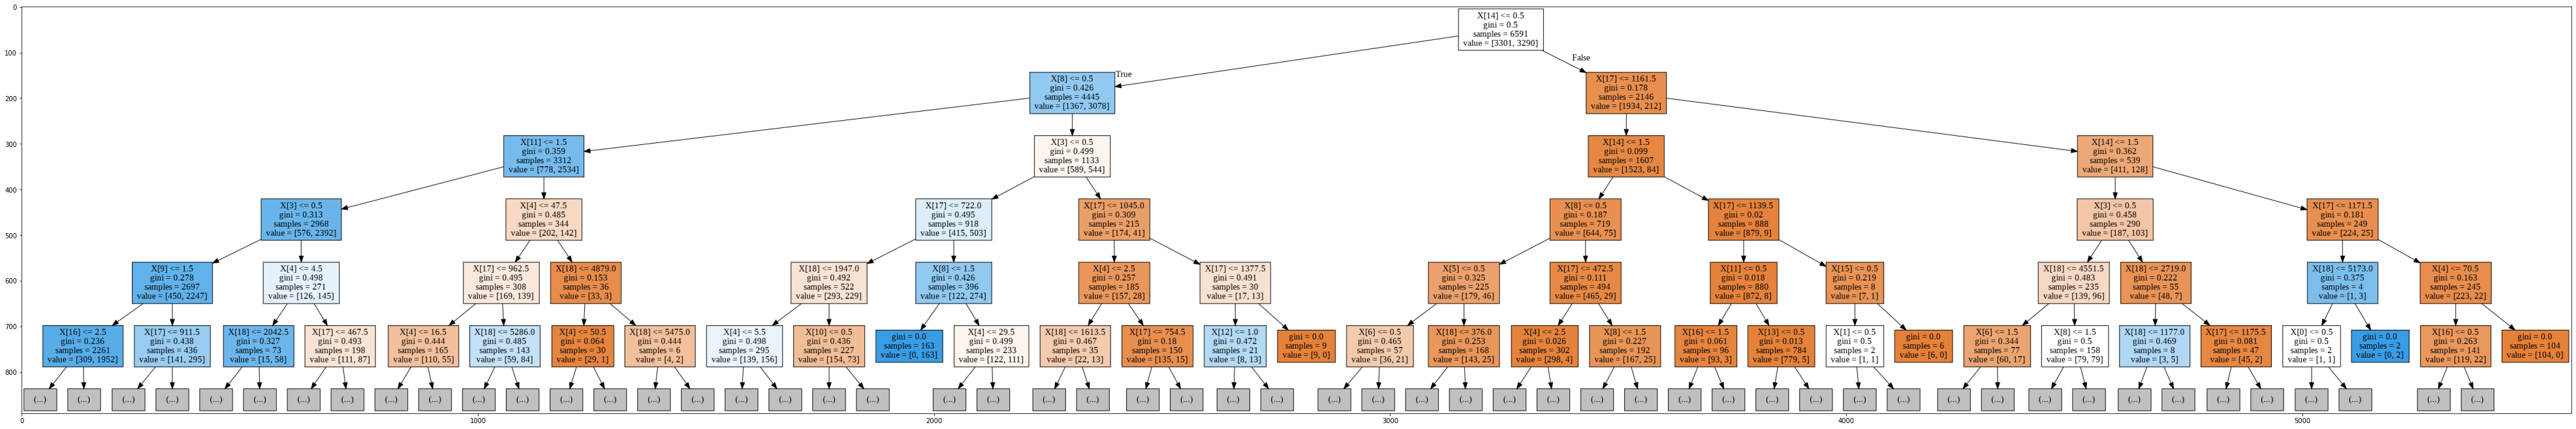

In [ ]:
graph.write_png('dt_model_tree.png')
plt.figure(figsize=(200,100))
plt.imshow(image)

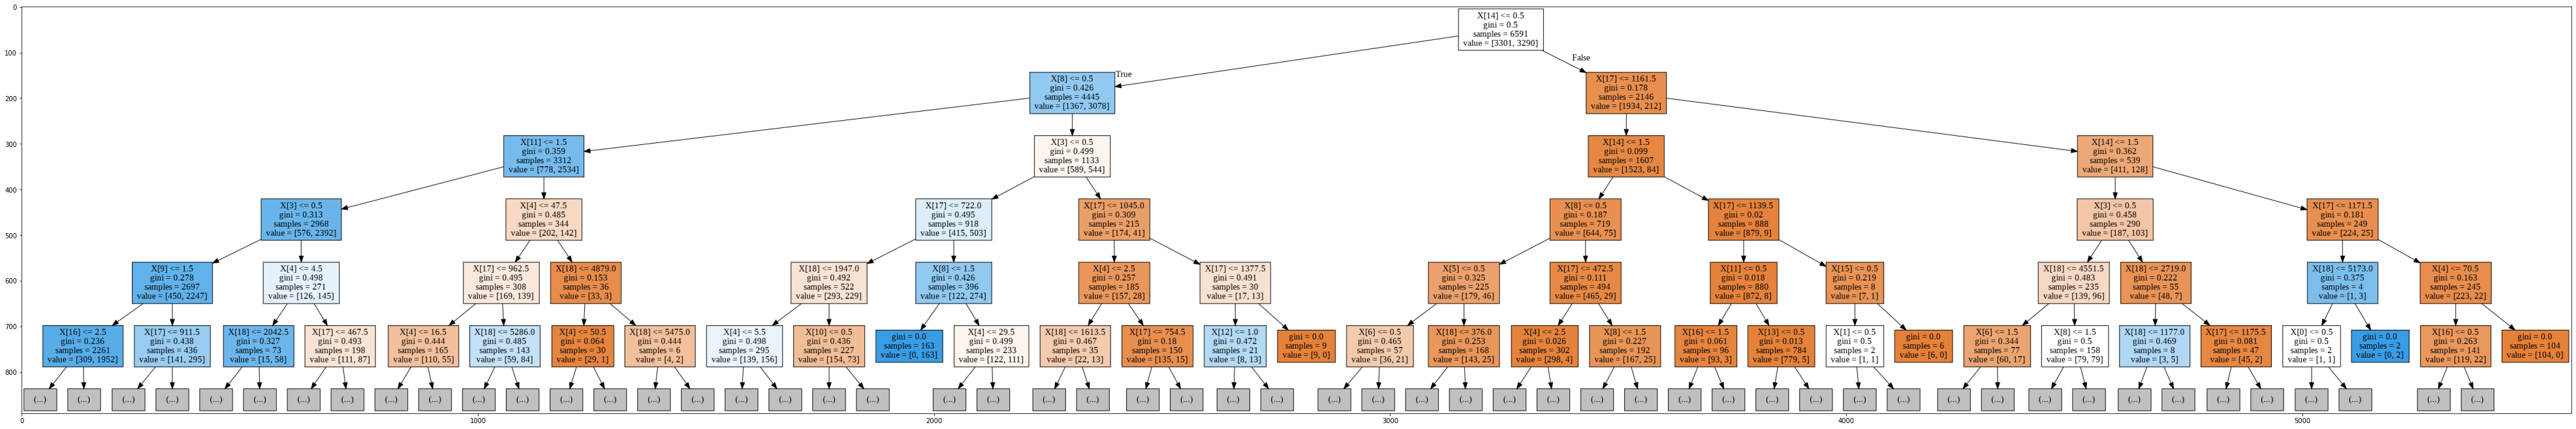

In [ ]:
# decision_tree = export_graphviz(dt_model,out_file='customer_churn_dataset.dot',max_depth=5,filled=True)

# !dot -Tpng customer_churn_dataset.dot -o customer_churn_dataset.png
# image = plt.imread('customer_churn_dataset.png')
# plt.figure(figsize=(70,100))
# plt.imshow(image)